## Proyecto final: Notebook 1

### David Tejeda - 9170350
### Juan Hernández - 9710120
### Mario Tabarini - 22000349


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

from sklearn.linear_model import LinearRegression

from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

import scipy.stats as stats
from IPython.display import display, HTML

import joblib

In [2]:
data = pd.read_csv('HR_employee_attrition_2.csv') #Se importa acrhivo .CSV
data.shape

(1470, 35)

In [3]:
data.head() #Se anailza estructura de dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1.0,1.0,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,1.0,2.0,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,1.0,4.0,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1.0,5.0,...,3,80,0,8,3,3,8,7,3,0
4,NaN,No,Travel_Rarely,591.0,NaN,2,1,Medical,1.0,7.0,...,4,80,1,6,3,3,2,2,2,2


## Análisis descriptivo de la data

In [4]:
data.describe() # Se evalúan medidas de tendencia central del dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1460.000000,1433.000000,1470.000000,1470.000000,1345.0,1456.000000,1429.000000,1456.000000,1455.000000,1399.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.919178,804.799721,9.192517,2.912925,1.0,1024.796016,2.727782,65.880495,2.729897,2.065761,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.119813,402.843480,8.106864,1.024165,0.0,604.913163,1.092086,20.346200,0.709946,1.111119,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,2.000000,1.0,485.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,805.000000,7.000000,3.000000,1.0,1012.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1560.500000,4.000000,83.250000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.info() # Se evalúan tipos de datos y cantidad de registros de cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1460 non-null   float64
 1   Attrition                 1451 non-null   object 
 2   BusinessTravel            1414 non-null   object 
 3   DailyRate                 1433 non-null   float64
 4   Department                1032 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1465 non-null   object 
 8   EmployeeCount             1345 non-null   float64
 9   EmployeeNumber            1456 non-null   float64
 10  EnvironmentSatisfaction   1429 non-null   float64
 11  Gender                    929 non-null    object 
 12  HourlyRate                1456 non-null   float64
 13  JobInvolvement            1455 non-null   float64
 14  JobLevel

## Matriz de correlación para evaluar grado de afinidad entre variables

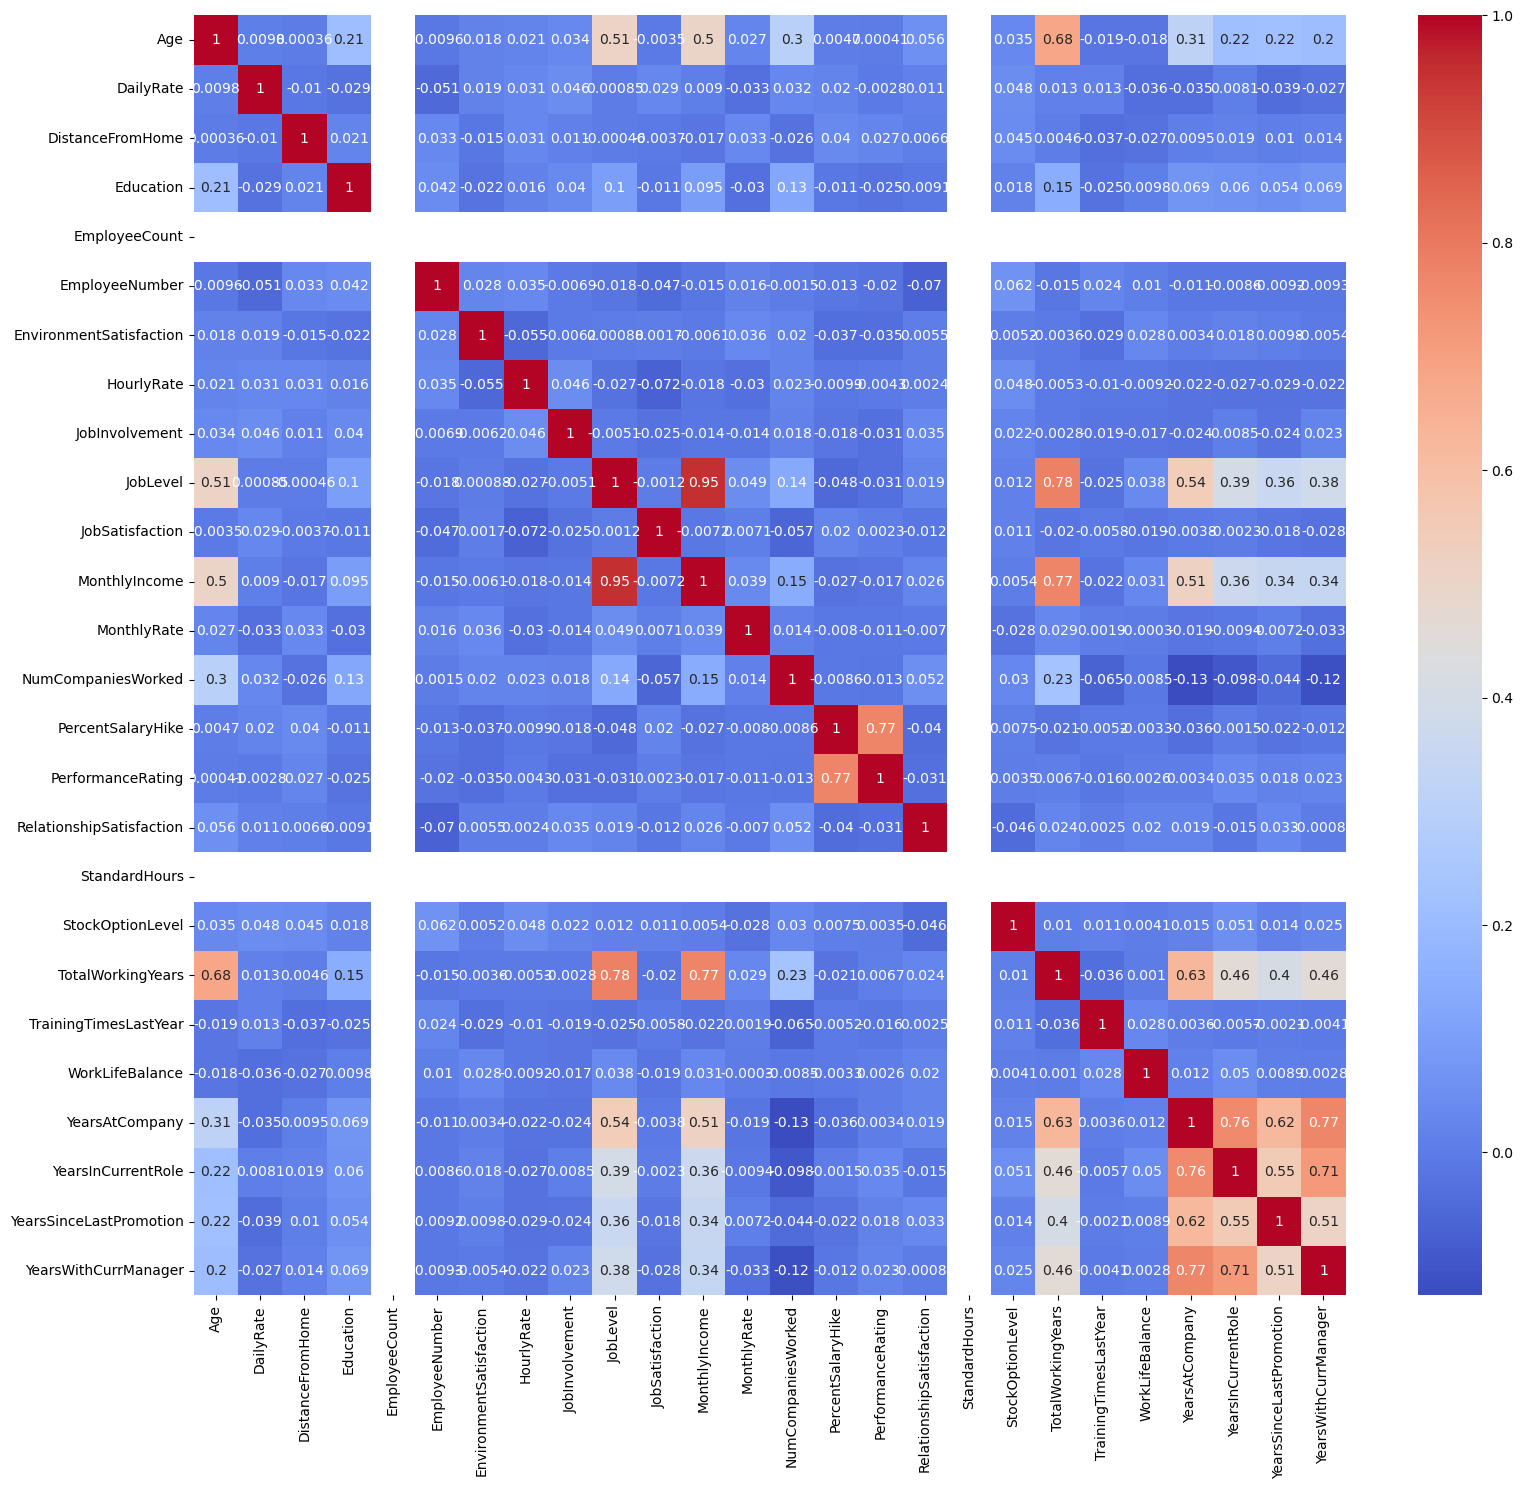

In [6]:
correlation_matrix = data.corr()

plt.figure(figsize=(18, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Se crea diagrama de correlación


plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95) # Se ajustan los márgenes de la matriz

plt.show()

## Gráfico de barras apiladas

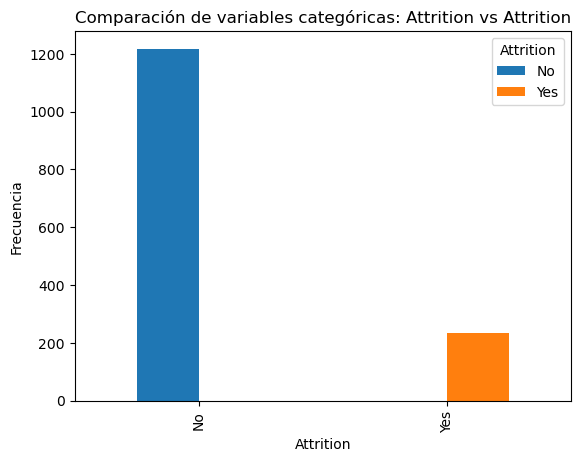

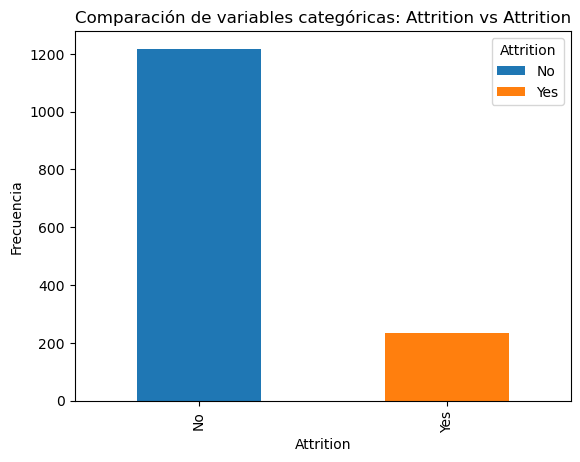

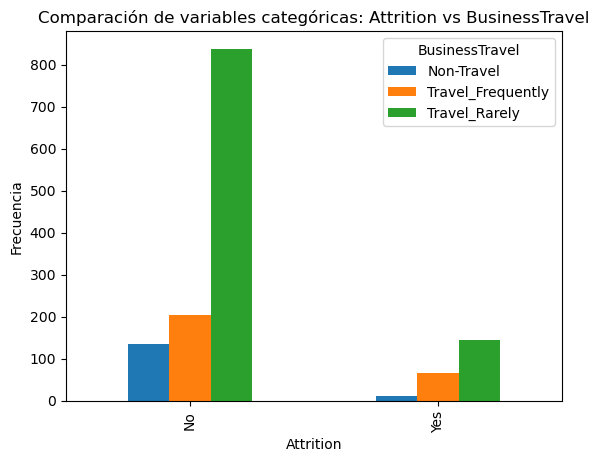

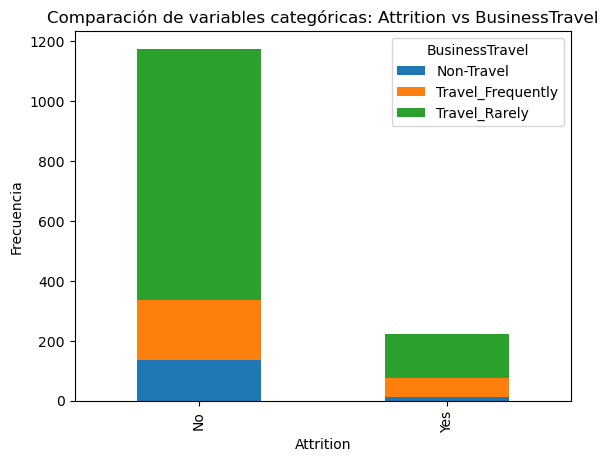

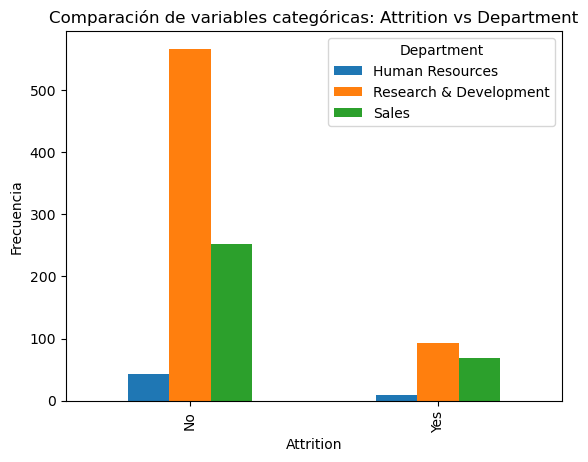

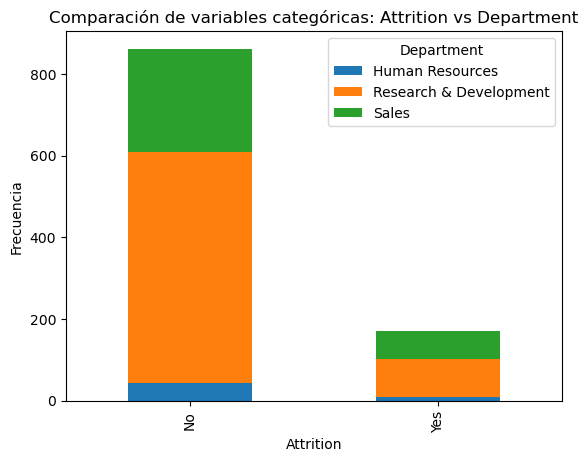

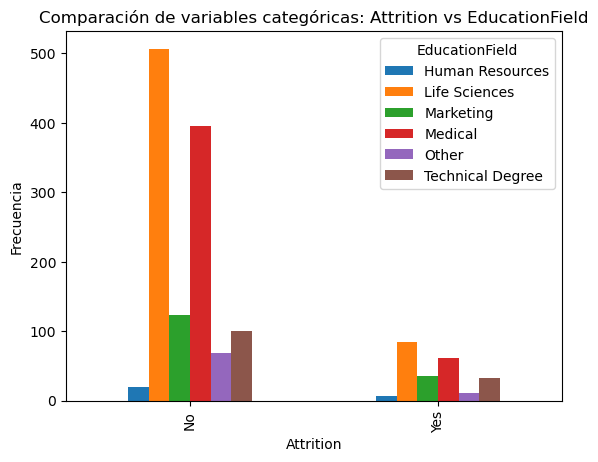

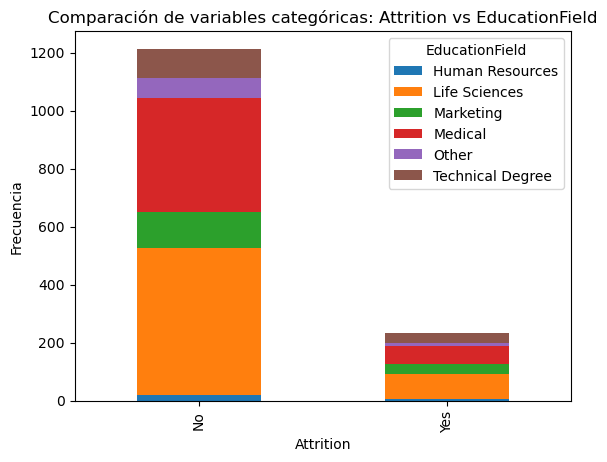

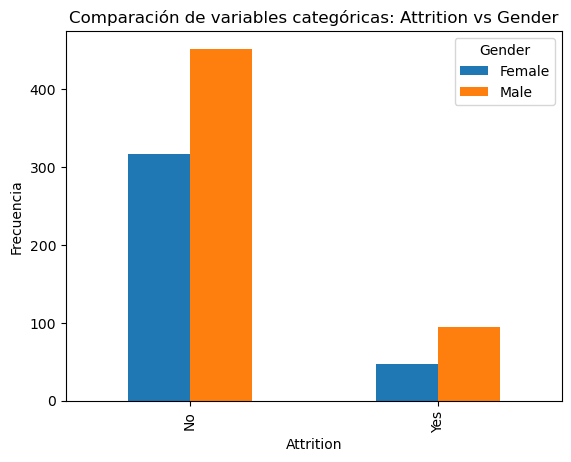

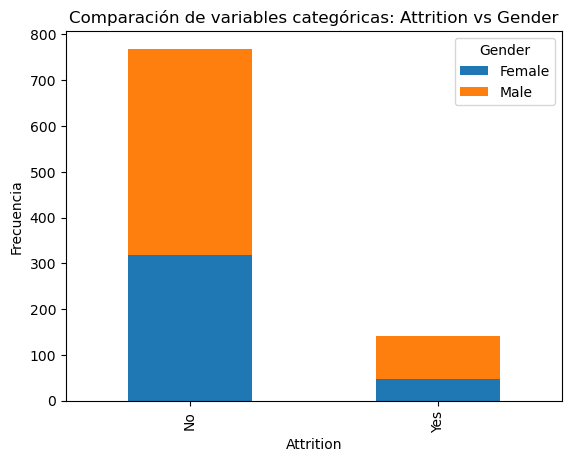

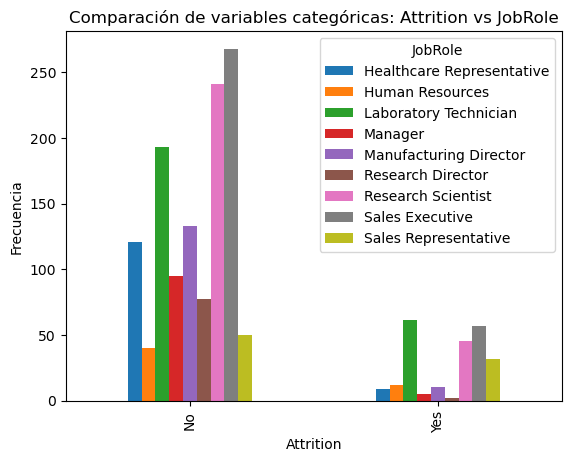

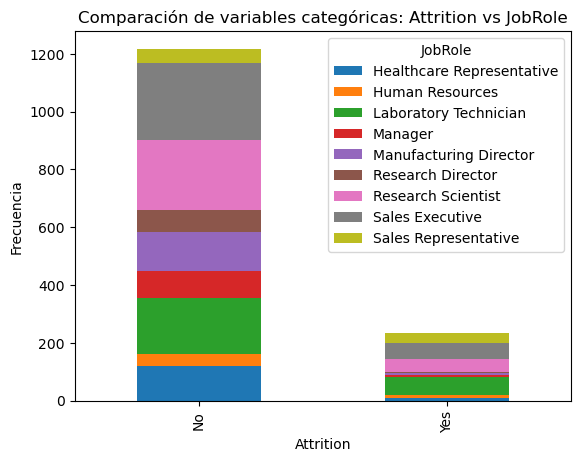

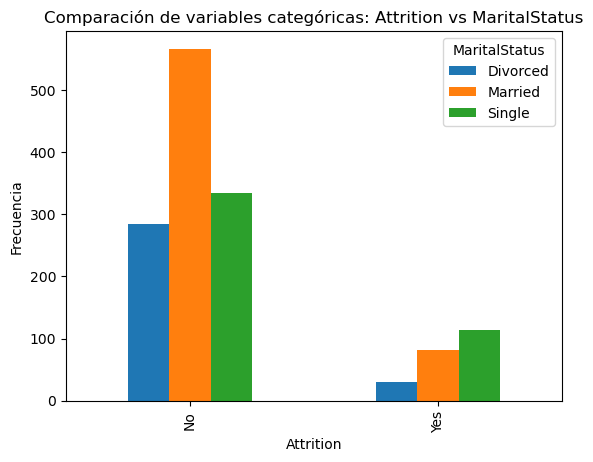

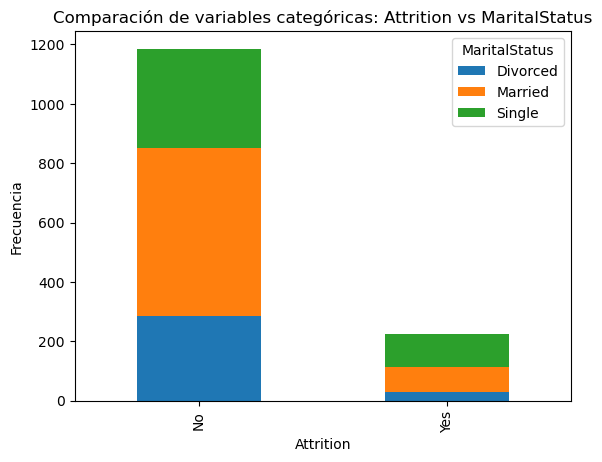

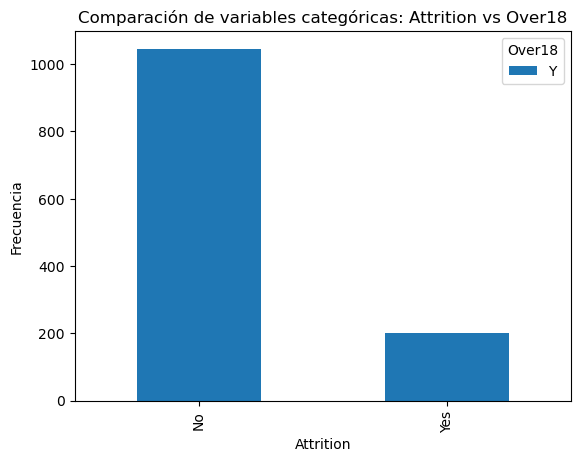

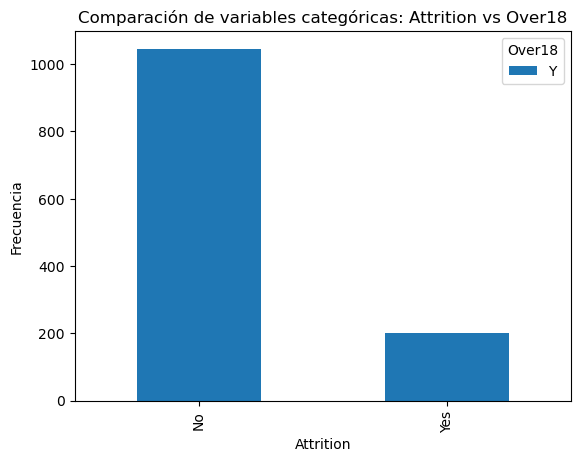

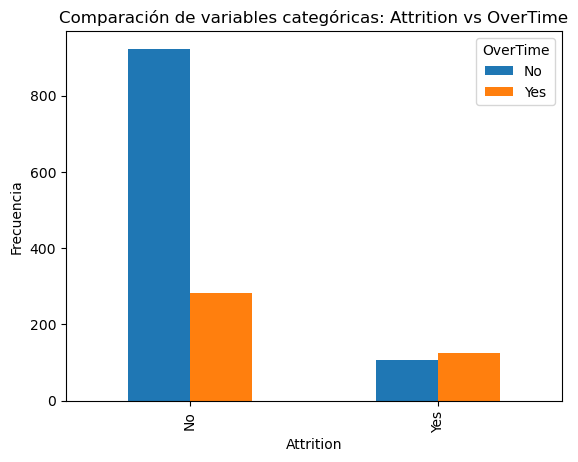

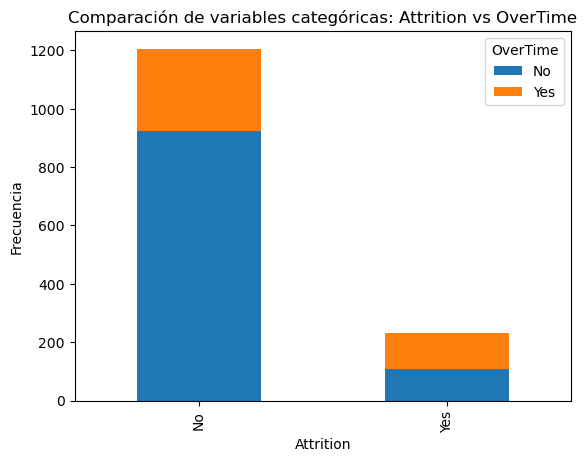

In [7]:
for col in data: # Se cuentan las frecuencias de cada combinación de categorías
    if(data[col].dtype == 'object'):
        counts = data.groupby(['Attrition', col]).size().unstack()

        counts.plot(kind='bar', stacked=False) # Se crea gráfico de barras para cada variable
        plt.xlabel('Attrition')
        plt.ylabel('Frecuencia')
        plt.title('Comparación de variables categóricas: Attrition vs '+col)
        plt.legend(title=col)

        plt.show()

        counts.plot(kind='bar', stacked=True) # Se crea gráfico de barras apiladas para cada variable
        plt.xlabel('Attrition')
        plt.ylabel('Frecuencia')
        plt.title('Comparación de variables categóricas: Attrition vs '+col)
        plt.legend(title=col)

        plt.show()


### Luego de haber evaluado todas las posibles variables, se ha determinado que la variable dependiente será Attrition, la cual será clasificada como "Sí" o "No" e indicará si existe posibilidad de que una persona se retire a corto plazo de la organización. 
### La o las variables predictoras serán determinadas conforme se establezca el modelo con mayor rendimiento.